In [110]:
#Importing the Libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib. pyplot as plt
import matplotlib
import sklearn
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [111]:
all_data=pd.read_csv("HDFCBANK.csv",na_values=None,index_col='Date',parse_dates=True,infer_datetime_format=True)
all_data.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2000-01-03,HDFCBANK,EQ,157.40,166.00,170.00,166.00,170.00,170.00,169.52,33259,5.638122e+11,NaN,NaN,NaN
2000-01-04,HDFCBANK,EQ,170.00,182.00,183.45,171.00,174.00,173.80,174.99,168710,2.952261e+12,NaN,NaN,NaN
2000-01-05,HDFCBANK,EQ,173.80,170.00,173.90,165.00,168.00,166.95,169.20,159820,2.704094e+12,NaN,NaN,NaN
2000-01-06,HDFCBANK,EQ,166.95,168.00,170.00,165.30,168.95,168.30,168.44,85026,1.432166e+12,NaN,NaN,NaN
2000-01-07,HDFCBANK,EQ,168.30,162.15,171.00,162.15,170.75,168.35,166.79,85144,1.420158e+12,NaN,NaN,NaN


In [112]:
features = ['Close']
eval_data= pd.DataFrame(columns=features, data=all_data, index=all_data.index)
eval_data.head()

,Close
Date,
2000-01-03,170.00
2000-01-04,173.80
2000-01-05,166.95
2000-01-06,168.30
2000-01-07,168.35


(array([728659., 730120., 731581., 733042., 734503., 735964., 737425.,
        738886.]), <a list of 8 Text major ticklabel objects>)

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000.]),
 <a list of 7 Text major ticklabel objects>)

Text(0.5, 1.0, 'The close values of HDFCBANK stock equity')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'close values')

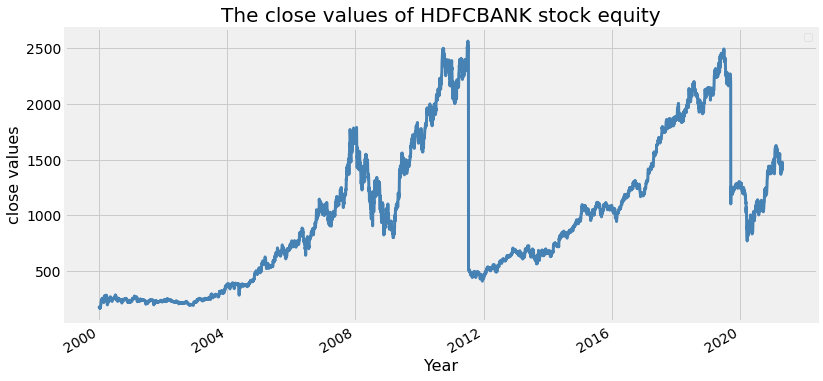

In [113]:
# line plot - the yearly accumulated rainfall in Barcelona
eval_data.plot(color='steelblue', linewidth=3, figsize=(12,6))

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend('')

# title and labels
plt.title('The close values of HDFCBANK stock equity', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('close values', fontsize=16)

In [114]:
eval_data['SMA_7'] = eval_data['Close'].rolling(7, min_periods=1).mean()

In [115]:
eval_data.head(7)
eval_data.info()

,Close,SMA_7
Date,,
2000-01-03,170.00,170.000000
2000-01-04,173.80,171.900000
2000-01-05,166.95,170.250000
2000-01-06,168.30,169.762500
2000-01-07,168.35,169.480000
2000-01-10,165.90,168.883333
2000-01-11,163.40,168.100000


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5306 entries, 2000-01-03 to 2021-04-30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   5306 non-null   float64
 1   SMA_7   5306 non-null   float64
dtypes: float64(2)
memory usage: 124.4 KB


<Figure size 864x432 with 0 Axes>

Text(0.5, 1.0, 'The close values of HDFCBANK stock equity')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'close values')

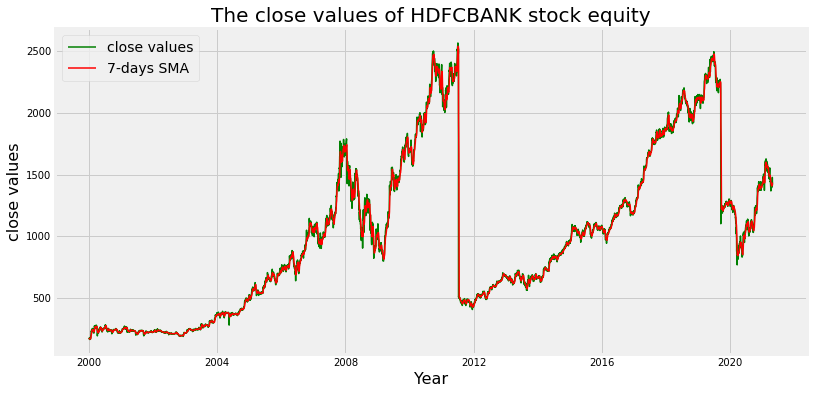

In [116]:
import matplotlib.pyplot as plt
# plot lines
plt.figure(figsize=(12, 6))
plt.title('The close values of HDFCBANK stock equity', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('close values', fontsize=16)
plt.plot(eval_data.index,eval_data['Close'], color='green',linewidth=1.5)
plt.plot(eval_data.index,eval_data['SMA_7'],color='red',linewidth=1.5)
plt.legend(labels =['close values', '7-days SMA'], fontsize=14)
plt.show()

In [118]:
#!pip install pmdarima

In [119]:
import sys
print("python version",sys.version)
import numpy
print("numpy version",numpy.__version__)
import scipy
print("scipy version",scipy.__version__)
import sklearn
print("scikit -learn version",sklearn.__version__)
import pandas
print("pandas version",pandas.__version__)
import statsmodels
print("statsmodels version",statsmodels.__version__)
import pmdarima
print("pyramid version",pmdarima.__version__)
import pip
print("pip version",pip.__version__)

python version 3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0]
numpy version 1.21.6
scipy version 1.4.1
scikit -learn version 1.0.2
pandas version 1.3.5
statsmodels version 0.13.2
pyramid version 1.8.5
pip version 21.1.3


In [120]:
import warnings
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
%matplotlib inline
from matplotlib.pylab import rcParams
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import pmdarima as pm
from sklearn import metrics
from pmdarima.arima import auto_arima
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [121]:
features = ['SMA_7']
df1=eval_data[features]
df1.head()

,SMA_7
Date,
2000-01-03,170.0000
2000-01-04,171.9000
2000-01-05,170.2500
2000-01-06,169.7625
2000-01-07,169.4800


In [122]:
df1.index = pd.to_datetime(df1.index)
df2=df1.resample('1M').mean()
df2.head()

,SMA_7
Date,
2000-01-31,175.580220
2000-02-29,235.749660
2000-03-31,257.619388
2000-04-30,231.026984
2000-05-31,250.489286


In [123]:
df2.head()
df2.tail()
df2.shape
df2.info()
df2.describe()

,SMA_7
Date,
2000-01-31,175.580220
2000-02-29,235.749660
2000-03-31,257.619388
2000-04-30,231.026984
2000-05-31,250.489286


,SMA_7
Date,
2020-12-31,1399.183117
2021-01-31,1447.522857
2021-02-28,1550.920357
2021-03-31,1531.064626
2021-04-30,1438.424060


(256, 1)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 256 entries, 2000-01-31 to 2021-04-30
Freq: M
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SMA_7   256 non-null    float64
dtypes: float64(1)
memory usage: 4.0 KB


,SMA_7
count,256.000000
mean,1008.422193
std,631.213771
min,175.580220
25%,472.373044
50%,953.667075
75%,1439.526593
max,2433.131579


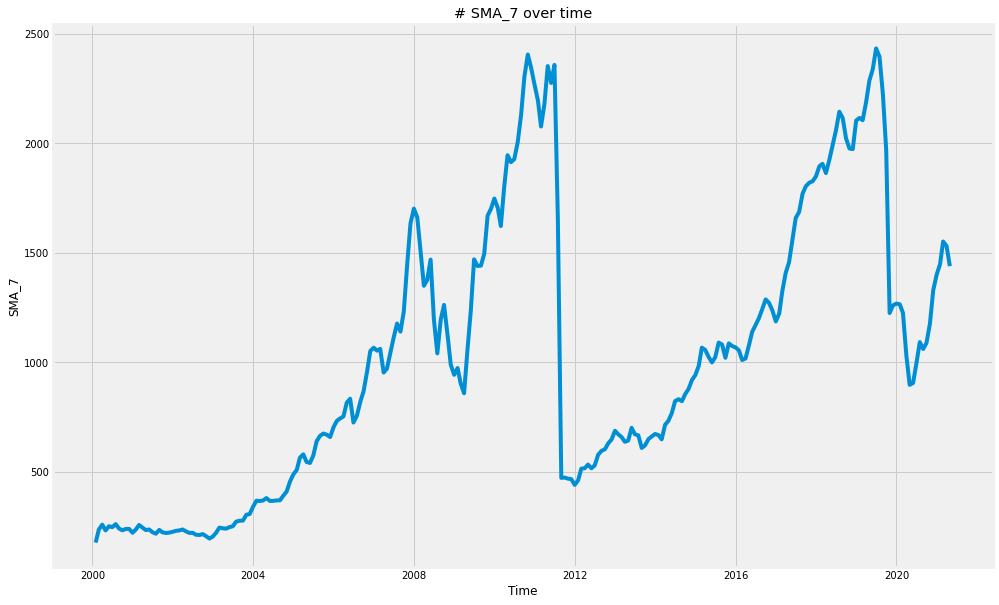

In [124]:
plt.figure(figsize=(15,10))
plt.plot(df2)
plt.xlabel('Time')
plt.ylabel('SMA_7')
plt.title("# SMA_7 over time")
plt.show;

In [125]:
decomposition=seasonal_decompose(df2,model='multiplicative',extrapolate_trend='freq')
trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid

<Figure size 1440x720 with 0 Axes>

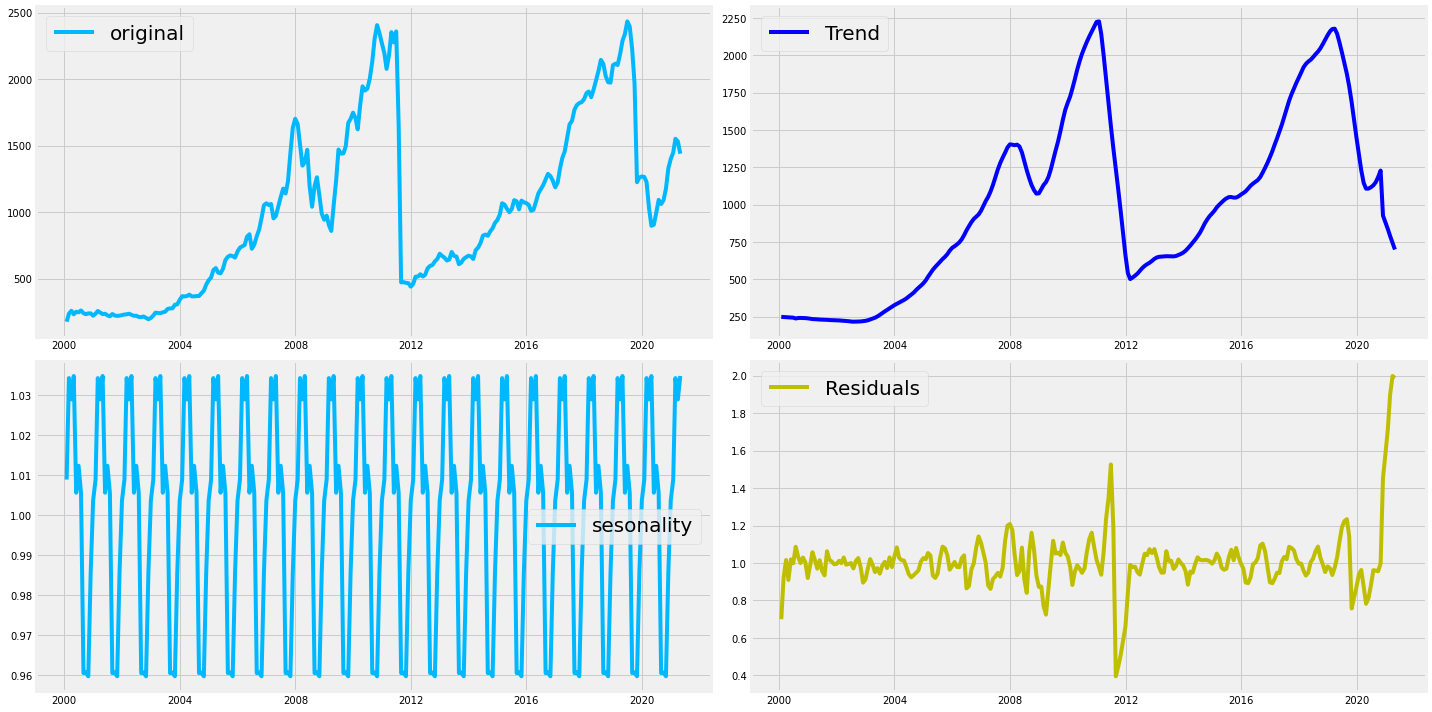

In [126]:
plt.figure(figsize=(20,10))
plt.subplot(221)
plt.plot(df2,color='#00b8ff',label='original')
plt.legend(loc='best',fontsize=20)
plt.subplot(222)
plt.plot(trend,'b',label='Trend')
plt.legend(loc='best',fontsize=20)
plt.subplot(223)
plt.plot(seasonal,color='#00b8ff',label='sesonality')
plt.legend(loc='best',fontsize=20)
plt.subplot(224)
plt.plot(residual,'y',label='Residuals')
plt.legend(loc='best',fontsize=20)
plt.tight_layout()
plt.show()

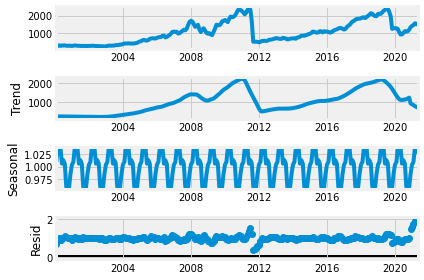

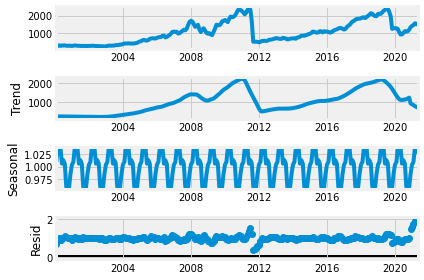

In [127]:
decomposition.plot()

In [128]:
decomposition=seasonal_decompose(df2,model='additive')

<Figure size 1440x720 with 0 Axes>

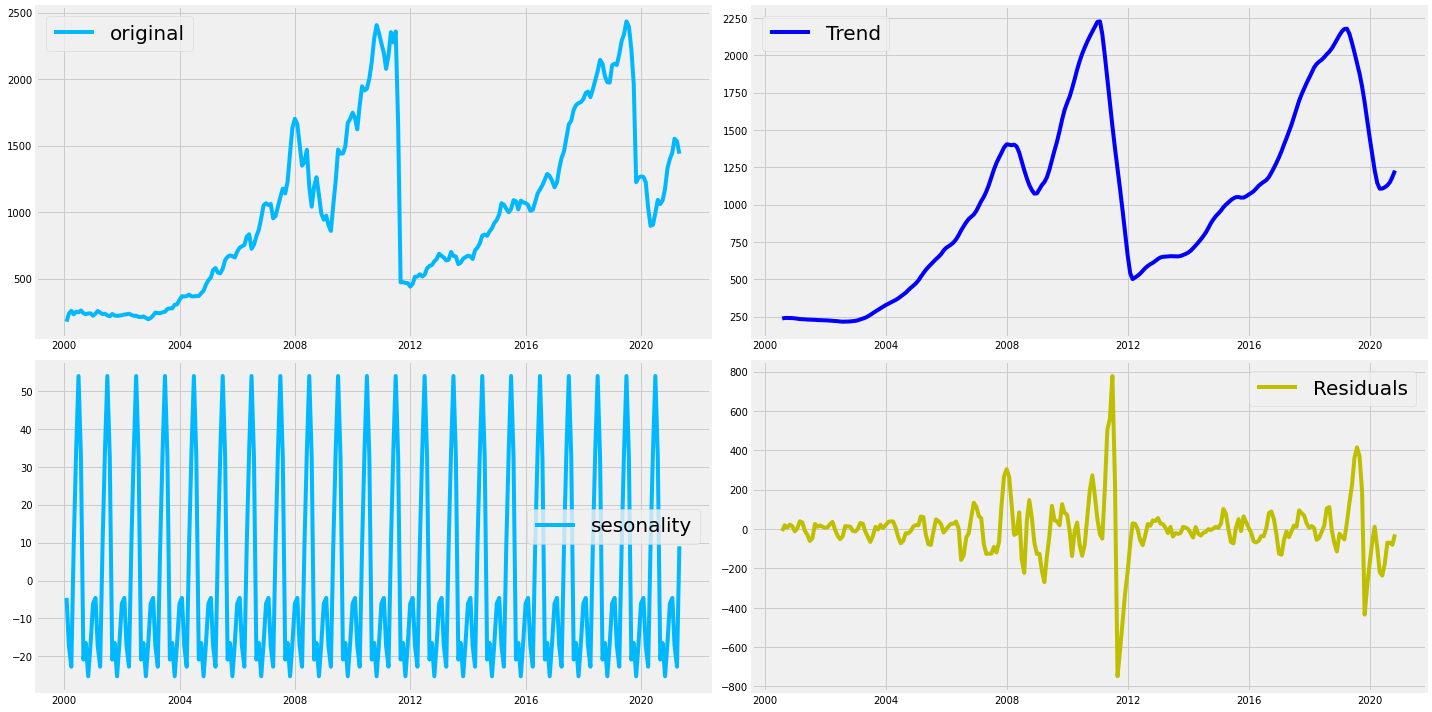

In [129]:
plt.figure(figsize=(20,10))
trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid
plt.subplot(221)
plt.plot(df2,color='#00b8ff',label='original')
plt.legend(loc='best',fontsize=20)
plt.subplot(222)
plt.plot(trend,'b',label='Trend')
plt.legend(loc='best',fontsize=20)
plt.subplot(223)
plt.plot(seasonal,color='#00b8ff',label='sesonality')
plt.legend(loc='best',fontsize=20)
plt.subplot(224)
plt.plot(residual,'y',label='Residuals')
plt.legend(loc='best',fontsize=20)
plt.tight_layout()
plt.show()

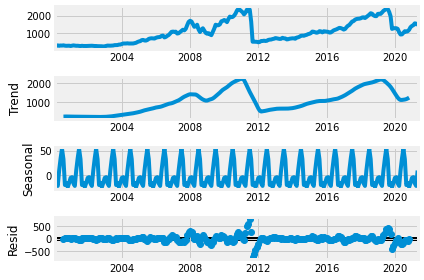

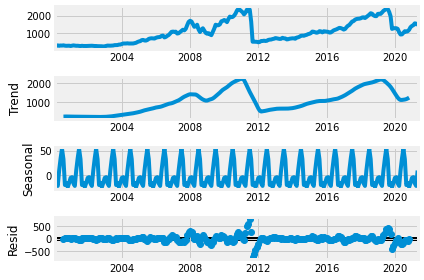

In [130]:
decomposition.plot()

In [131]:
from pmdarima.arima.stationarity import ADFTest
adf_test=ADFTest(alpha=0.05)
adf_test.should_diff (df2)

(0.2068869636894, True)

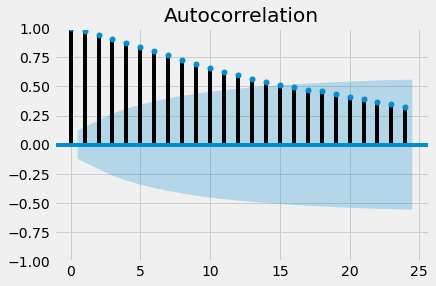

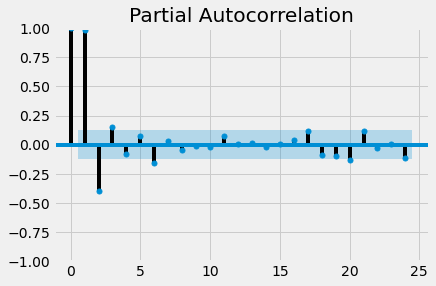

In [132]:
# Loading the packages
import pandas as pd
from statsmodels.graphics import tsaplots
plt.style.use('fivethirtyeight')

# Display the autocorrelation plot of your time series
fig = tsaplots.plot_acf(df2, lags=24)
plt.show()

# Display the partial autocorrelation plot of your time series
fig = tsaplots.plot_pacf(df2, lags=24)
plt.show()

In [133]:
train,test=df2[:240],df2[240:]
train.shape
test.shape

(240, 1)

(16, 1)

<Figure size 864x432 with 0 Axes>

Text(0.5, 1.0, 'The Train vs Train of HDFCBANK stock equity')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Train Data vs Test Data')

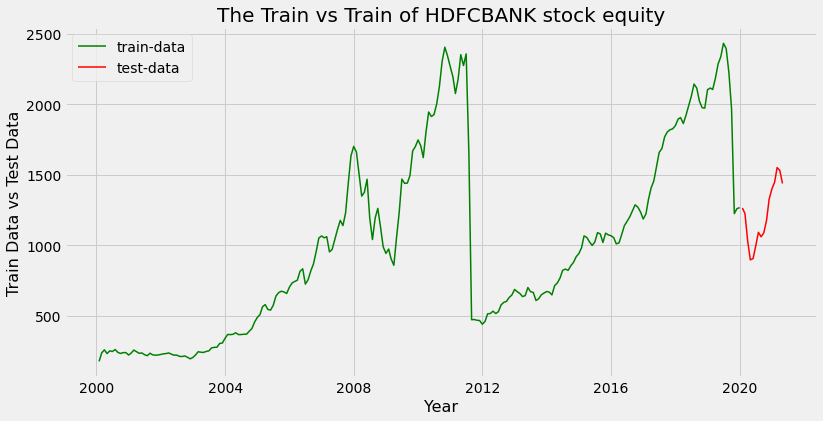

In [134]:
import matplotlib.pyplot as plt
# plot lines
plt.figure(figsize=(12, 6))
plt.title('The Train vs Train of HDFCBANK stock equity', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Train Data vs Test Data', fontsize=16)
plt.plot(train, color='green',linewidth=1.5)
plt.plot(test,color='red',linewidth=1.5)
plt.legend(labels =['train-data', 'test-data'], fontsize=14)
plt.show()

In [135]:
#fitting a stepwise model:
Arima_model=auto_arima(train,start_p=0,start_q=2,max_p=13,max_q=4,start_P=0,start_Q=0,max_P=8,max_Q=8,
                       m=12,seasonal=True,trace=True,error_action='warn',suppress_warnings=False,stepwise=True,random_state=20,n_fits=30)

Performing stepwise search to minimize aic
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=2930.331, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2977.715, Time=0.05 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2943.752, Time=0.22 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2931.561, Time=1.18 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2976.051, Time=0.02 sec
 ARIMA(0,1,2)(1,0,0)[12] intercept   : AIC=2931.795, Time=1.38 sec
 ARIMA(0,1,2)(0,0,1)[12] intercept   : AIC=2931.854, Time=1.09 sec
 ARIMA(0,1,2)(1,0,1)[12] intercept   : AIC=2933.600, Time=2.93 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=2929.856, Time=0.33 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=2931.530, Time=0.95 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=2933.140, Time=1.99 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=2929.255, Time=0.75 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=2930.654, Time=1.00 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=2930.656, Time=1.66 sec
 ARIMA(1,1,1)(1,0,1

In [136]:
Arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  240
Model:               SARIMAX(1, 1, 2)   Log Likelihood               -1458.712
Date:                Tue, 12 Jul 2022   AIC                           2925.424
Time:                        04:20:12   BIC                           2939.329
Sample:                             0   HQIC                          2931.027
                                - 240                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8454      0.110     -7.678      0.000      -1.061      -0.630
ma.L1          1.3626      0.102     13.355      0.000       1.163       1.563
ma.L2          0.3802      0.076      5.002      0.000       0.231       0.529
sigma2      1.167e+04    373.508     31.244      0.000    1.09e+04    1.24e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              7169.89
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):              17.11   Skew:                            -3.78
Prob(H) (two-sided):                  0.00   Kurtosis:                        28.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [137]:
prediction=pd.DataFrame(Arima_model.predict(n_periods=16),index=test.index)
prediction.columns=['Predicted_SMA_7']
prediction

,Predicted_SMA_7
Date,
2020-01-31,1134.540651
2020-02-29,1175.750150
2020-03-31,1140.911072
2020-04-30,1170.364508
2020-05-31,1145.464168
2020-06-30,1166.515258
2020-07-31,1148.718377
2020-08-31,1163.764105
2020-09-30,1151.044239


<Figure size 1080x720 with 0 Axes>

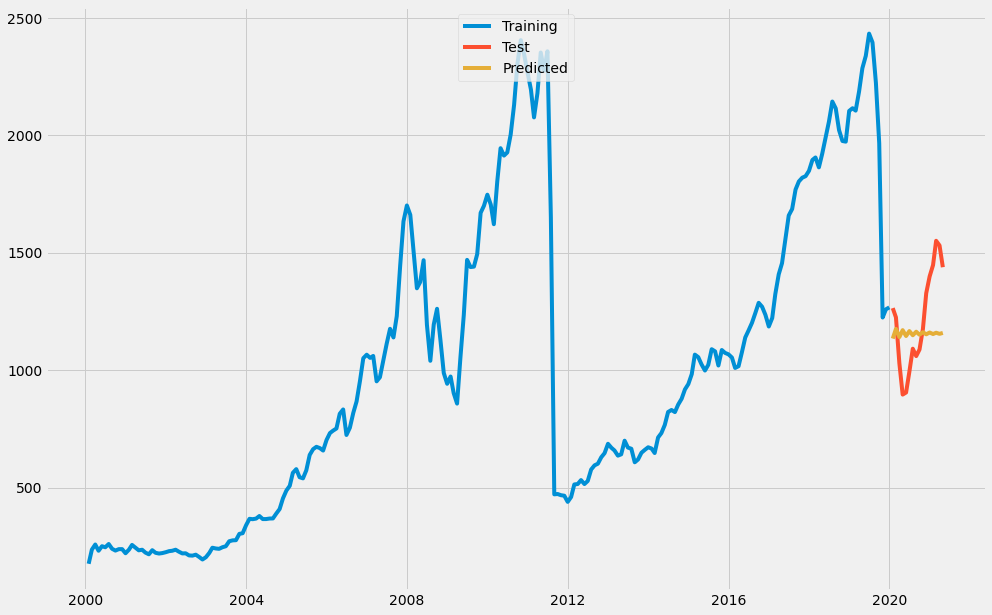

In [138]:
plt.figure(figsize=(15,10))
plt.plot(train,label='Training')
plt.plot(test,label='Test')
plt.plot(prediction,label='Predicted')
plt.legend(loc='upper center')
plt.show()

In [139]:
test['Predicted_SMA_7']=prediction
test['Error']=test['SMA_7']-test['Predicted_SMA_7']
test

,SMA_7,Predicted_SMA_7,Error
Date,,,
2020-01-31,1264.272360,1134.540651,129.731709
2020-02-29,1224.808929,1175.750150,49.058778
2020-03-31,1029.945578,1140.911072,-110.965494
2020-04-30,896.050397,1170.364508,-274.314111
2020-05-31,904.957519,1145.464168,-240.506649
2020-06-30,993.643506,1166.515258,-172.871752
2020-07-31,1091.478261,1148.718377,-57.240116
2020-08-31,1059.982993,1163.764105,-103.781112
2020-09-30,1087.932468,1151.044239,-63.111772


**STEP6-EVALUATE MODEL PERFORMANCE for SMA_7ARIMA**

**MEAN ABSOLUTE ERROR (MAE) FOR TEST DATA**

In [140]:
from sklearn.metrics import mean_absolute_error
print("MEAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS")
np.round(mean_absolute_error(test.SMA_7,test.Predicted_SMA_7),3)

MEAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS


185.643

**MEAN SQUARE ERROR (MSE) FOR TEST DATA**

In [141]:
from sklearn.metrics import mean_squared_error
print("MEAN SQUARE ERROR (MSE) FOR TEST DATA IS")
mse=np.round(mean_squared_error(test.SMA_7,test.Predicted_SMA_7),3)
mse

MEAN SQUARE ERROR (MSE) FOR TEST DATA IS


47486.114

**ROOT MEAN SQUARE ERROR (MSE) FOR TEST DATA**

In [142]:
import math
math.sqrt(mse)

217.91308817966856

**MEDIAN ABSOLUTE ERROR (MAE) FOR TEST DATA**

In [143]:
from sklearn.metrics import median_absolute_error
print("MEDIAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS")
np.round(median_absolute_error(test.SMA_7,test.Predicted_SMA_7),3)

MEDIAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS


173.925

**Mean Absolute Percentage Error FOR TEST DATA**

In [144]:
print("MAPE FOR TEST DATA IS")
mape1 = np.mean(np.abs((test.SMA_7-test.Predicted_SMA_7)/test.SMA_7))*100
np.round(mape1,3)

MAPE FOR TEST DATA IS


15.09

,SMA_7
Date,
2000-01-31,5.168096
2000-02-29,5.462770
2000-03-31,5.551483
2000-04-30,5.442535
2000-05-31,5.523416


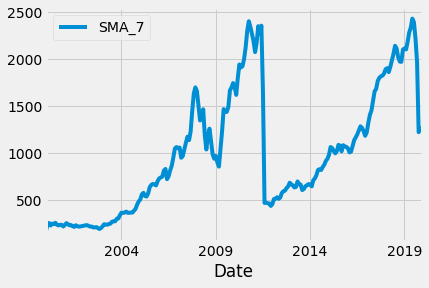

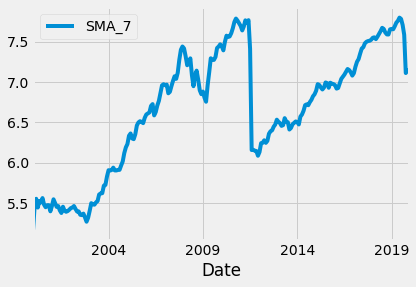

In [145]:
train_log=np.log(train)
train_log.head()
train.plot()
train_log.plot()
plt.show()

In [146]:
#fitting a stepwise model:
Arima_model=auto_arima(train_log,start_p=0,start_q=0,max_p=14,max_q=5,start_P=0,start_Q=0,max_P=8,max_Q=8,
                       m=12,seasonal=True,trace=True,error_action='warn',suppress_warnings=False,stepwise=True,random_state=20,n_fits=30)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-378.556, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-391.919, Time=0.26 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-394.951, Time=0.36 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-379.176, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=-396.703, Time=0.10 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=-394.994, Time=0.29 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=-393.760, Time=0.81 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=-395.185, Time=0.20 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=-395.117, Time=0.15 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=-393.638, Time=0.15 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=-393.548, Time=0.68 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=-397.777, Time=0.04 sec
 ARIMA(0,1,1)(1,0,0)[12]             : AIC=-395.991, Time=0.14 sec
 ARIMA(0,1,1)(0,0,1)[12]             : AIC=-395.958, Time=0.16 sec
 ARIMA(0,1,1)(1,0,1

In [147]:
Arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  240
Model:               SARIMAX(0, 1, 1)   Log Likelihood                 200.888
Date:                Tue, 12 Jul 2022   AIC                           -397.777
Time:                        04:20:17   BIC                           -390.824
Sample:                             0   HQIC                          -394.975
                                - 240                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.3158      0.025     12.581      0.000       0.267       0.365
sigma2         0.0109      0.000     44.087      0.000       0.010       0.011
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):             38078.85
Prob(Q):                              0.73   Prob(JB):                         0.00
Heteroskedasticity (H):               1.16   Skew:                            -5.79
Prob(H) (two-sided):                  0.52   Kurtosis:                        63.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [148]:
prediction_log=pd.DataFrame(Arima_model.predict(n_periods=16),index=test.index)
prediction_log.columns=['Predicted_SMA_7']

In [149]:
prediction_log

,Predicted_SMA_7
Date,
2020-01-31,7.130005
2020-02-29,7.130005
2020-03-31,7.130005
2020-04-30,7.130005
2020-05-31,7.130005
2020-06-30,7.130005
2020-07-31,7.130005
2020-08-31,7.130005
2020-09-30,7.130005


In [150]:
prediction1=np.exp(prediction_log)
prediction1

,Predicted_SMA_7
Date,
2020-01-31,1248.883469
2020-02-29,1248.883469
2020-03-31,1248.883469
2020-04-30,1248.883469
2020-05-31,1248.883469
2020-06-30,1248.883469
2020-07-31,1248.883469
2020-08-31,1248.883469
2020-09-30,1248.883469


In [151]:
test['log_prediction']=prediction1
test['Error_log']=test['SMA_7']-test['log_prediction']
#test=test.drop(['train_log'],axis=1)
test.head()

,SMA_7,Predicted_SMA_7,Error,log_prediction,Error_log
Date,,,,,
2020-01-31,1264.272360,1134.540651,129.731709,1248.883469,15.388891
2020-02-29,1224.808929,1175.750150,49.058778,1248.883469,-24.074541
2020-03-31,1029.945578,1140.911072,-110.965494,1248.883469,-218.937891
2020-04-30,896.050397,1170.364508,-274.314111,1248.883469,-352.833073
2020-05-31,904.957519,1145.464168,-240.506649,1248.883469,-343.925951


**STEP6-EVALUATE MODEL PERFORMANCE for SMA_7ARIMA**

**MEAN ABSOLUTE ERROR (MAE) FOR TEST DATA**

In [152]:
from sklearn.metrics import mean_absolute_error
print("MEAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS")
np.round(mean_absolute_error(test.SMA_7,prediction1),3)

MEAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS


187.034

**MEAN SQUARE ERROR (MSE) FOR TEST DATA**

In [153]:
from sklearn.metrics import mean_squared_error
print("MEAN SQUARE ERROR (MSE) FOR TEST DATA IS")
mse=np.round(mean_squared_error(test.SMA_7,prediction1),3)
mse

MEAN SQUARE ERROR (MSE) FOR TEST DATA IS


45216.214

**ROOT MEAN SQUARE ERROR (MSE) FOR TEST DATA**

In [154]:
import math
math.sqrt(mse)

212.64104495604795

**MEDIAN ABSOLUTE ERROR (MAE) FOR TEST DATA**

In [155]:
from sklearn.metrics import median_absolute_error
print("MEDIAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS")
np.round(median_absolute_error(test.SMA_7,prediction1),3)

MEDIAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS


189.221

**Mean Absolute Percentage Error FOR TEST DATA**

In [156]:
print("MAPE FOR TEST DATA IS")
mape1 = np.mean(np.abs((test.SMA_7-prediction1)/test.SMA_7))*100
np.round(mape1,3)

MAPE FOR TEST DATA IS


2020-01-31 00:00:00   NaN
2020-02-29 00:00:00   NaN
2020-03-31 00:00:00   NaN
2020-04-30 00:00:00   NaN
2020-05-31 00:00:00   NaN
2020-06-30 00:00:00   NaN
2020-07-31 00:00:00   NaN
2020-08-31 00:00:00   NaN
2020-09-30 00:00:00   NaN
2020-10-31 00:00:00   NaN
2020-11-30 00:00:00   NaN
2020-12-31 00:00:00   NaN
2021-01-31 00:00:00   NaN
2021-02-28 00:00:00   NaN
2021-03-31 00:00:00   NaN
2021-04-30 00:00:00   NaN
Predicted_SMA_7       NaN
dtype: float64

In [157]:
test.head()

,SMA_7,Predicted_SMA_7,Error,log_prediction,Error_log
Date,,,,,
2020-01-31,1264.272360,1134.540651,129.731709,1248.883469,15.388891
2020-02-29,1224.808929,1175.750150,49.058778,1248.883469,-24.074541
2020-03-31,1029.945578,1140.911072,-110.965494,1248.883469,-218.937891
2020-04-30,896.050397,1170.364508,-274.314111,1248.883469,-352.833073
2020-05-31,904.957519,1145.464168,-240.506649,1248.883469,-343.925951


<Figure size 864x432 with 0 Axes>

Text(0.5, 1.0, 'The close values of HDFCBANK stock equity')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'close values')

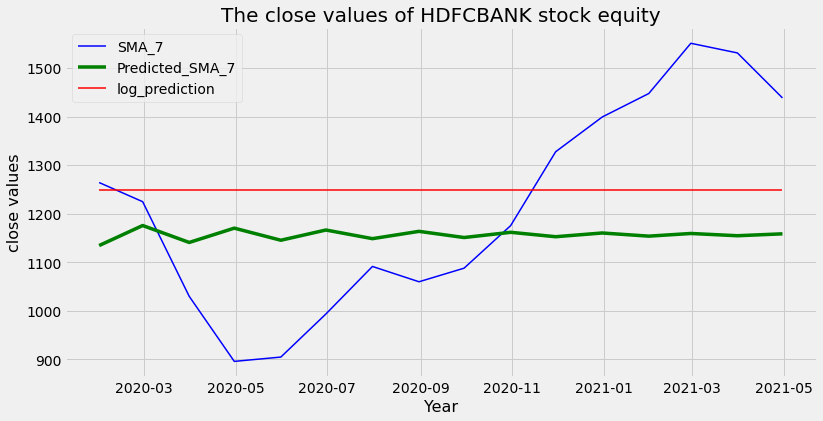

In [158]:
import matplotlib.pyplot as plt
# plot lines
plt.figure(figsize=(12, 6))
plt.title('The close values of HDFCBANK stock equity', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('close values', fontsize=16)
plt.plot(test.index,test['SMA_7'],color='b',linewidth=1.5)
plt.plot(test.index,test['Predicted_SMA_7'],color='g',linewidth=3.5)
plt.plot(test.index,test['log_prediction'],color='r',linewidth=1.5)
plt.legend(labels =['SMA_7', 'Predicted_SMA_7','log_prediction'], fontsize=14)
plt.show()

In [159]:
!jupyter nbconvert SMA_7ARIMA_StockMarketPrediction.ipynb

[NbConvertApp] Converting notebook SMA_7ARIMA_StockMarketPrediction.ipynb to html
[NbConvertApp] Writing 1438010 bytes to SMA_7ARIMA_StockMarketPrediction.html
